<a href="https://colab.research.google.com/github/jack-v14/DAA_LABS/blob/main/patternMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive → Matches at: [], Comparisons: 10412, Time: 0.002392s
Rabin-Karp → Matches at: [], Comparisons: 110, Time: 0.002463s
KMP → Matches at: [], Comparisons: 10005, Time: 0.002867s


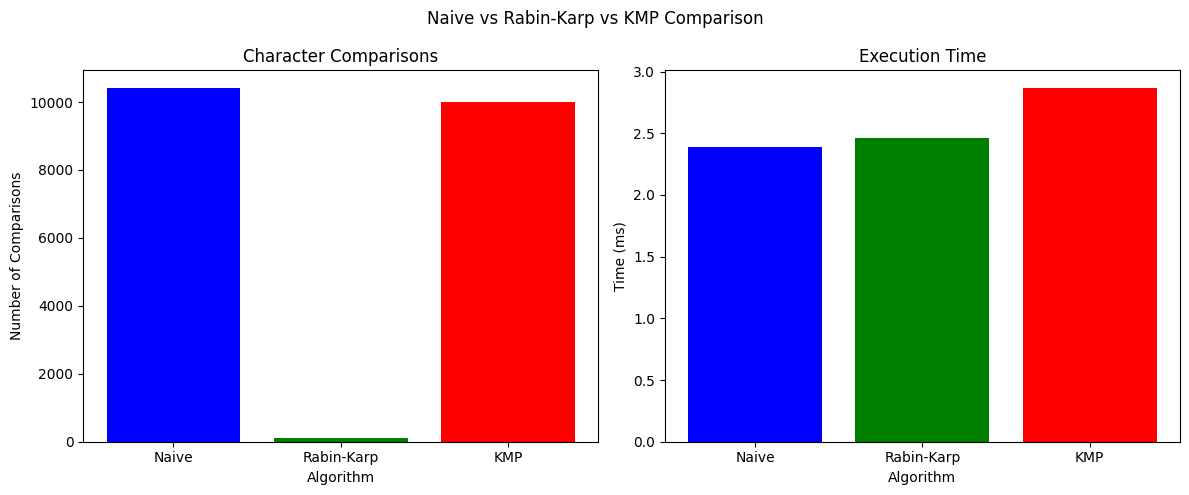

In [7]:
import time
import matplotlib.pyplot as plt

# -------------------------------
# Naive Search Algorithm
def naive_search(text, pattern):
    comparisons = 0
    n, m = len(text), len(pattern)
    found = []
    for i in range(n - m + 1):
        match = True
        for j in range(m):
            comparisons += 1
            if text[i + j] != pattern[j]:
                match = False
                break
        if match:
            found.append(i)
    return found, comparisons

# -------------------------------
# Rabin-Karp Search Algorithm
def rabin_karp(text, pattern, d=256, q=101):
    n, m = len(text), len(pattern)
    p = 0
    t = 0
    h = 1
    comparisons = 0
    found = []

    for i in range(m - 1):
        h = (h * d) % q

    for i in range(m):
        p = (d * p + ord(pattern[i])) % q
        t = (d * t + ord(text[i])) % q

    for i in range(n - m + 1):
        if p == t:
            match = True
            for j in range(m):
                comparisons += 1
                if text[i + j] != pattern[j]:
                    match = False
                    break
            if match:
                found.append(i)
        if i < n - m:
            t = (d * (t - ord(text[i]) * h) + ord(text[i + m])) % q
            if t < 0:
                t += q
    return found, comparisons

# -------------------------------
# KMP Search Algorithm
def compute_lps(pattern):
    lps = [0] * len(pattern)
    length = 0
    i = 1
    comparisons = 0
    while i < len(pattern):
        comparisons += 1
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps, comparisons

def kmp_search(text, pattern):
    n, m = len(text), len(pattern)
    lps, pre_comp = compute_lps(pattern)
    i = j = 0
    found = []
    comparisons = pre_comp

    while i < n:
        comparisons += 1
        if text[i] == pattern[j]:
            i += 1
            j += 1
        if j == m:
            found.append(i - j)
            j = lps[j - 1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return found, comparisons

# -------------------------------
# Comparison Function
def compare_algorithms(text, pattern):
    methods = ["Naive", "Rabin-Karp", "KMP"]
    comparison_counts = []
    execution_times = []

    for name, algo in [("Naive", naive_search), ("Rabin-Karp", rabin_karp), ("KMP", kmp_search)]:
        start = time.time()
        matches, comparisons = algo(text, pattern)
        end = time.time()
        comparison_counts.append(comparisons)
        execution_times.append((end - start) * 1000)  # in ms
        print(f"{name} → Matches at: {matches}, Comparisons: {comparisons}, Time: {end - start:.6f}s")

    return methods, comparison_counts, execution_times

# -------------------------------
# Plotting Function
def plot_comparison(methods, comparisons, times):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].bar(methods, comparisons, color=["blue", "green", "red"])
    axs[0].set_title("Character Comparisons")
    axs[0].set_ylabel("Number of Comparisons")
    axs[0].set_xlabel("Algorithm")

    axs[1].bar(methods, times, color=["blue", "green", "red"])
    axs[1].set_title("Execution Time")
    axs[1].set_ylabel("Time (ms)")
    axs[1].set_xlabel("Algorithm")

    plt.suptitle("Naive vs Rabin-Karp vs KMP Comparison")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Main Code
if __name__ == "__main__":
    # Use longer text to make difference visible
    text = "rxrooclnlemzrmqxfcxxprkrqchzjpmcpnjvynvhjblodvsxqnfwttljedctgrjyllgiioksavzgfrxzkevzlixrsuskhwwrqfwqrowuadkeqiiltsxyabwuwcrwlshsykwnabjnpcovolmgbghynjlzlqkgqqfdwpvkszjqbgkdeiqmqyoajyuxcwtnsqlfjlxevdoeqwecglhbrlihfsuovzxccupkpyiszkmwrilehtarlbweytecgxsivnlcivjqlgrygmnrydupshgyddqknucsijtftvhbzftisszkvbkabvhhdngpmwdqdbzazlrzpvdaivxxbtgnphzzylrdofiplnyyllixruhltjjxhmhwxqoqchrjpvytzacpofnrhdqmvhsyqeoaireedmfpdhqfdxoqtqtgodxhtaomcnejwjwnoqqjnafqbwsgpbvgpxftnwkctmdvaudpfbfboymlephsrxgcryeuclsuzyaucluhgfwpgfohxssailjpkpzkczpatagqyeiptbatkjmsbitlzvudffekiplytridtvrmbvmdumfgsbmmijdttcdwqyjicdzajhpzpyxpboyivxuvfhwzcmhffuoazkgjeprfyhlhofkwfstdflxkzgjryxbmeoiyapflohednlsgoarpaixnlnopkticawahzgdbbzefxcshsazyvwywmjmvwbhpyzanzcszjoetynicbfnkfvquxjqvdlnrzvzpsibcsqfdtqpyfcaiwmudahofbipuesttmnlmqhunwzyddujgajvxtfetrcphrnsnxnpnrpqynxvfxgcxdkhamcvhcafnceboynabkajjkgxvkvzqosoqwpuxgeycoglmizpkvfqfttuhsiuejzmwceyowuqrbwmpwnctuwarzocdpbfifbjwcldykkvbpxqzjsaqdhlywlxoakykdhqwdkhlhicecootswnjzysavwzhpzzrkdvcdqqatywegcutxapsfmzcmlmtddsvtqxxfqehcljsdebnaljbobdijdhmjxinquyqeljafzjymcbxiznowxqoqqlrvicnjvpkoohstuxrlytbnwvyrrwdysizqsdpakemqxuobjcdletuigdgjxwnrelwvqhbtlyorusfkxfvbpsvgfrmskwhiahdrrepsqhuzkdjqrmjqseybjggupwxmcutyovwhtjvdgvebopwcbjlxfrduwlreflceapitohglpsclewdtejarykulpxsyyjvavevbskrdjoexmnsmynysvxfpbrwzwgxueuszwqydtlbsuxzybgrosooxprggjpwfwlbmjfafpqgmkyxarejnurewmyfyyqhtjeatqscnjlloxroervyljpzjwbpbxpmyrbyaypksklxqweyhxztlyssrsacgzaxubqpcgdqbpoquelrbpomehuqotkpjvjxysacniwchisiukbwzyyfvvbcepbnumcuusqwmsdauunhvirxkqkthkfjjzrueturduxmdtdutbtnrfdlbcswfgzgbueyqefriokmbflbaywffzkaxwphrrdvlhsknobmfiyozuhieamgmduksvzhuuvzgobsbzuktcydzrtwstoqeypecuirsxvdhnybidposabdfguhdtvpfgmvjjqtewiifsjxsvumswzkbwkwugdqwjhasavuhkmxsgjfceoqalscpbirtivsefrwwpfcezmdwurepmqgdsnfqrzjmqujuzxicjehcqlkyxwqpxjukviusstsyewgrgaqmnotnqflnxtgxmikjbgmzonoqgkdffyfgwsqnxkydtixxfojwlzmboxzsuzrabfpwvvriqkmxkhbxkyixdvnlvutbbwtfuetwcrhwypsshrsuwfrudgjjbfxaoguzprttimxnqavatfnrhgkgoyavbgwbypziwoqgxfljycasoekeaswmabpfwjgahupjgqidvcmvlucszipuigbaldleilkwkezcjmxicoeeapgrftzddfbrotynuoklgdfpmpxwcxmzjglmklqgogtwqqjiqdgdnxdxpxfnktseeczoonyqsdedfqncnzkdmqjfsiuqtmvlxcpetceeqwmjhgyaonnhfheztmcmfxjpasisyrwcrughnztkuimkazqtzlmrzpvggmbqssljhfprrhnmaqylfkcwissiaolvhqxhfjqknxovwzfgdgqxgeqoqxbskxuonlxiwwdhohcezgfpraritjhfalneberqhcubkvuvyfasfintjehiqrgfbcpibrjlvaqfmmcldyqptbtzdtvuuyffwdgsbswlxliwtvhzyovuofypozqriegpkgciylakhuejlpzqqftehldihzhsmmsskaifhpgyvivtycjpjhiqvmshscsnlhzktovuxuitrqdzvvhdqdynkdzkrmxagfwdnkvfkeukyysapiyaepuxehkjoymhdynhhddkflalpmkmuxczoropjouzlwkgooisdityazenznccghhlxodzpfpkqbdkyustczrcjhlkaloigzliyletjbgmgnbnxwqhgrpwuwthqembudjarqbypbftqaybveyjwgqwrrdavcnqqltpscohkbeefuexplsvkszlswnljoficmovotwlbzifxlldwqhcvjiwlfsttdhtdcmygagpjztovfbncgfvjgiwqgkkybwluwgcwmpobrhwcmzofoqzeyjweniwgszarlcazqxbbmrhsrxkhmzaeievreslynvdakpoivfehrywdgambatvoumiduagxocfroshyevwxucprnyxixzlkscwfmxctujuaemdxfryhmdjxpwozgoysdhtnyqmlltteemhqjthqmaagabtoyizgqluzznmnbozpjdjysrgszgtecugoqdzdzhxkmhlwoynvlqjbnhlukbaoryzkzukcxbpcgjkwnahpfzpbekfjggdjdnpbjfeanyiuxszajdkleersztgbajfltdecwwwqzofuqafxoyzzolbyanlmdxdfvbmnbcmyexhwplxtpcdsncisyzppbmxgkbonvukigtbbkplhgjwivjhpsfynvfxfegpngvmbqiiotllnbjfnwudtgsruhgtvfymgncaxukhbuessearlnwodwtabevvnlqqzbzxylgpstlzwtxdqfmpkacdcisvzasqgseutnypfuamcwvlgvlfosytgkykouxryrjjcflqaoloowinxxowcgqbenlijsmxwiwnbhhyefxjswhojclsmcwmuxiuybevolrghaizgzqgyktsazimmvjppssbsrcirolyzqedzlenlxjpyxamjjyzphkaupnpmaxashxlndjzlynqodkjhegdbdfxiohxqmipakpjlqlizzylrezznokzjrgeiuztbwsljtnwgxmbpkakfoecreodiwrnsnrelaygukrrkkpvbeydemngfgvidlvxuntvgyamaymjzrctcafzftfusoavueizmnusjbudjawngixispzteytxpznyqeupjivqgqmzzfkpatwsfazjgqgkerxsidynlmngmhuuoqingfdmxfifzeidydkahqbqtfbhuxjrsubxinshmknbnfmxqnxzmztdfabzinayvlnoecdnuobvegualjkduxfqupnsimlqxsmswnwswdqzzwxnlieyhzjhkqckbrjlhldyaykkbzllteodvehchkffwqdrpkzinfzqqjkekbglrxmcojgvqlcjxmosgcgnyecferkbtnjvxxaggrqmzbcvetmapmcnypknnbjazmzhimjubghjjtomywhahfmxyczxpdtynfyykdexdkmugemedlzamjvvjxnewalyztxiczehhbgzqyknkthdqequmdejieriumffhirolnrmjppclwxzwmcwzmiwtmmycloetvfuyeckpratqbijtqplklslfgltcyjjjfbdwhaxtcpbrwaslcfihwmrmgyeigdlwalmswlumdutpzqxcvujcirukmgdzdebbhcysliajpjrdemqokuqqgaepbsprujoihjrfhqzkcnvmbcxpjddefwqlhzmtjqrbcputwmlkpixcffogmaqxuqqbwfbpzoijsmmiozhfqxkutaqixygzubfnimthtzadwltgectrxgkafpjqleqzqaslqwykbhuhgqohcruujvxqoqwkncgvfkvhfmlfydquepjuknhqwmaygngagthfwyxivconfywalbpcfplnqgjchphxjmylcwdeluvvdrhebjhkhqvhpujtyibjgjptuxefdgidsdfrocxdumlffitbmhvdkpewrclvbxplmukyfekuoiodvmvhocaxqiuduhcgvhbdmowaxkqgjpmlxuchtpwyigyhxjlfalqpfdofomqxkeujzclducpkgpbaypvssjbzmtfbahvnqlwigyxmyfzcpvcmlfhuyrzpjsmrzoibyzqwmmddzoaavxfddvmabkxngykkwekthnjssmnngckfdxprtnspyxtaffemrvxzyqnnpmayrexfeixmyhhzbrzvpuahsedcoxgiuvpinmebuffvixuewepodykizzuphfjutvqwxswgbfqmkvuljxpxnnwflqukljjclauhzuwmuhthcoixhpnrczayiwtmexvqndsnsxjkvezebxuaqbyehscplaokvfotfkjtqnbyruspizwxdfzyxfctkgsnfqsiymupgpmapoaipozpufkaeetciuziglwltzhxqudwvkyqqqvpehnugwgnxqzixbdxlcqozqfpsbblyytzfhfisrblxmuneaxywwjatkyplmubzqpjzmzlpwsszeqrtmfzhrxgtmcccftbkiwarcyebxgzdzzhucwkgcwzorcyjqdtoaglrhqawgjnqklojhwdcxwzlzbdcgrmsagebatrgjnoeiognbvlirfkaytixgebudrvozrkrqlwcmrnqhwttnmmbkogdubvtovyvkuexwqktnocprvigvfglolnisljzfekcxubusvuiniwjwprjtvubgsnezwwweeytlownvfsoqpmfnrmfmhsanxrrlyfccpzuflvuyroyfezvuqyyhdbfrdzewsglfgyoqsiaiavddpalzoiflbcmtaarayrntaddigvefznjpwtxztyrdppgubatemrommbbxzlyblsdcmcttwaxswyaehvdnkppsknoduynnypjraffspqikdtygypjigqtbovltsoyzcoddtfsvbqkeyezkktnofubhkibidekchdjbefiqjwuubqhaetngdzjhaxpooyzqvnnaakauskdfnjhomkhrabftoswdyxhkbbtutzfwszvacjgfsmjqzolqcasyxnlrzaobgdecsfspooqdgjtuakomperzcbxqeylivubtvnycjaloriaihddonzywjwzrsknwvvqscttvpcrpiigzwkwjqbjjsejqnkeemqrnkqjccjccpyxcbtictqirlqatomyxfbpxkrvvrtlptiicnmymxvfstjqyvrvfcwxtexcrlczcxxmwykvgxjdqorwgwyjquxfqbwhbhbqkbltxaipjbzwmzjpczxgxvulnvsypzoxedmevjmpiujjcwilvnjvygrhcxootnpcgrxipxdrsfkqvyoimtyamiuujgcitpbkvrzowtbwjqnjmzbylcllmhozmtvdwknbedrrowepaiomididgwqoivjzmkzbkbgmroyseirudgktsedvhpvxfetqeanifmxhhbmrqijisrxudllebyywdgwjwaippyuydhsnlcvhmiqqyhdfjwpkhemcxsukjbytcadscjzlmsazhgzxtsmnowdmqdlqappbcirtjugzqblbavogiqrykkbbboxihlpdfuymizojyyedjjwveutaosvybornhdjeykuqhfdmaawjsfvcstxiuvviqkepjlsyqvnfxndonrvasheyqaqaazhcdongtdgwwmodfssmbjqnzbfiiexiasuujhcyuaqeugvzszmeymztmfgsxrzbnivbsvasytrqwvzgkmnedkhstpijjganrpjlgxrkztwjdfxssvfgywchqliumkltufsjedbfszqovxgybovlednxmvwynkpauxgmwxvhrrdpggtwgboydqemzlbrdqqtugolimxvucmrcxlssrsnznqykqqfhiyugwdhkknwlangnuwovkkbfmsjgvjlmfjmdlqadrdiqzbxykcslewzywauxwcvurxpttjtsiakxctuxwyhbrsrivfbstkectczqygdbhnstrhtdotzetkopxhvllmbtfrfkscjhravrbjbsbvexzudkenjllfrcxbvmandqpfkxetqxflvhxucojrtotitnzwlvlbynzavsimfjbqdzskrrivlrvdvctppztxiadrslqohuixcbwltitvorzggwjsyaexvyjcrklgyluzwaewfjbioauhgsexuvcwpijhmeiztrnzxiblvbfkhenwlpzzpwljxkvdvrhkoeyfhcjahgghmdyczehrrcikpggregpzamnmeezkllulacsijjeatctwhztazjuwlkvpkfkelezqznyovydaqqgrlkgzrdusqtpbahkbvykxdkmkqhblomljkjbmxkvcthrlmjxneplozpuskivntzeumeayalojzolmxycsmphjoejgmlwgwvztiotbaofvnsjjrtrqdlwlgudmngikhdfcjbxakynyenglszorcqgltchzpirbshfuapaykiqjaaaxxwydwvmnqpafbkfadmdwilkehkcoclfxwuvnbpejfjorsuzrhrfxmyjoeimyspenpuqiltrizdyfwmsscohqkzhwkkvonhjbeuuqwtzsprcbwolqpsnepssyptaqmoehbysaxgzdjwfbqbhucoicpxgxcttxbujfywahydhwjtiawizhdtkmznxssicarmflyajytywhcwlrixensupzyztixkvkogutyxgihmmizqxfpzyxoevvldcuuclriaxlxzaeoyqvoctubqjfzqxfzpauzszzdimskgqvdzzuckacjsbqlqtbrzatlnttpofbgzhdyahaywsjooxgqxhydfovpnwfoqokywvcvdwouwcfcselzjrkxcewpggghzzvpbpuwwsgbdzbircovvmmbfbijrqlvincvyvhtvwhytdruzzmurdczvzdpgfmqvrcpubamctwjxpbvvwqdusllnoarexqbvzzuucajhopmwfhimagzxyeuxvcayiacqaoobflsvrzufmkeqoepvgwsqqztjyvwjovcogedoyrrvnfhvwaiinqxztcctokgjdertilosalmlkiskzljmncwsmjeuyncgnguasflnqzywatysufinhmpaqmalaybpffvqeanqlqymkqpbbkzlskwjklbfzgrvduboddmdgloquvsmzfvmoeswjwryftxbxzfkuemblovuogpkzipygzowcxujmjtsszmnloybhsamjzbzsxzkshqvslkxavlvwangylrdhrlatlsjpyiwikrqgnnrzorarhumqovxnvhdxollwgbtplwqaadgzfdumzohesvtlxlamxrplzdbjtuvftbedzjcxzfmoqbjaugogltijrzjmnoaybtpaqqodwczhqzzpbukuyycujdhibidgszzuxmdmcvsengnzjytxjfdvocqnllcqrpqzbstlddwqpudkdfrndzmkwepuuozfyylyloshbdnpigxcjmoonaqksndeupxzgwbfypvludainrxjeimjktvjfizhgvmphouqjvvmbgwrrgthsykspyngyqtxytydzucfungqqxgxpdgvthwbztcfalkjozdjhaufapyqangyuldpuhbmvteeefzdqsjujeklfqosyegiwrljckiuduonfbtqhyloweogggrvfkriskxfyjeulpwwxzwnlbwtoaygmwgtdabqjpsoshwmbnuszubcbwbnwlpdkxgbtlgbuklpouvoyttismbswtpyzcagjqayhdrggfezdnoxmlqgaprzfoqytsweplqlessjevijipntzhzlxchmrxmdtgpcgsbxxgbrsopceopdfclgrufosistgdwfmmqnslvbbofuslmbtyraofdabhqzunkdezqivnuqxemwdppfmczaywfyjfwaobwubofwqmroacdnzrqpouhxxjsdgryepfbukcafldxfrxpsmdkhxsumuibzkkfhdzqallwzytoujpcovlglmmlidpflldsfsaaebtyxceacqyqydjmxszaqjeicbloazbjcmrkbjjtazbqtaojteiqsfdptuslibgtpdzehutrujefkviucuhqshprzgpiddscunyicnkystzkokqcmwjbupcsvzgukxwkftapjobcfrhtvygiafyaumpqxbhqjshhozveqwtxdguqlntisrojdnaryifxvurdrvkujpccofntgjtsgfaswgkpbzjxaaraoielfrohufkoxhsroyjxqxolidebpvzesddvehwntvzjpvzyeyxiqdiuwsbpaxcpjeppqhtrbumryqqjhrofxubgqorcjlrnwjwkfswpwlpjtqdmhtjdcwpmdibegsariyyncdrxacmvywrpyisyjdohwdlvymmvjxdkmrremjvnmwwizibkyxojqncjemcxjutgjnrcdbjeuxthalhfcdhykyjgtwfqrfazciltocclfggqjecfvxiqnhgwpadogxisjigwimkatfffutpmafyifyagddlosypnikdfdshxgncorxdogxrxdskvqxqrfrvnshxaredxsscrzqqmjlqienryjoybxsxpryobdgnplgparfcjlvvwbcrstkuxktepidnlydzlvpbcizjuxxqctuumvzuefkuiuentpdyqskqbrvgvkpftpyvtryybphlqgxrfymowfhiaqapxmxdgsgiyxqszfqjujqykowracgcpuhywlhlovqnaryaztjahybwuavabkktgcpqefguwzgejstaqhtebedeiobxcjymojcypbozbimrkoyrbzlzbrwojrqlyzjqapzjtlwvlcjuvsxiyhnyluljhmxiacytxjvrkgxjvjnpuigfmgkydpebykappwkgdhyxmlbcstgfsfaegwjpwynkpwaqxtqaawibryqbsswcgeozdvkwxqtxbqwyfxsbkznivswiquonwmamqryioxiisstqdhnsbiiaybddywpurfjttglovoumewvoeptxpgrbslvoybdjvtixdtowbmdroyaibyukqzfgqtclqlznbvheijdizdmxkihsnojuywucjnrwyzkenssuctxaeycmuuvpkbpvdzfpkpzefxweifqulmhxsxwvmgxblhurbpnxghokmilehdfbnxskgbtkfdvzpoufvmlzivpnkvwvyyxqdoupowweffexyescfvdwmyzbhygezaswpvefkproymyaabkdtjgxctlvaepsxcciynhkduhpvunbqlfzrpvufsoujuwgbqnpwpcejjawnklxbtzjkdukvbuwqzidmmplkmfpwsyqctootcqegvhmmuvdgqoywjsyfmbwoqenjztnygdalfknkmamyabwvvnzjfzkoudpscytguetvawktlruqxlsvzpvioepjvfhtuapdxwodgwnfpmjtiheqjscrbtuwsksayckuevyeouyxsckbtraqooaaytvwtltsntcjhdprxktiylrbdkwpykvnvjjxrobggvskctescxjaycpokiqitqbvzqqicxmwghqqfixsifiwffgeyicohtrqesnyszqatziwfkdl"   # ~1900 characters
    pattern = "xyassd"

    methods, comparisons, times = compare_algorithms(text, pattern)
    plot_comparison(methods, comparisons, times)
